## Purpose
The purpose of this notebook is to understand the distribution of the epidemiology dataset and of the reporting of rare disease epidemiology in general.

In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt; plt.rcdefaults()

### About the data
*whole_abstract_set_corrected.csv* is a comma separated sheet of all of the abstracts returned from the API call. Irrelevant abstracts from the positive set (reviewed manually) have been removed from this corrected set (11 unique abstracts), and 3 abstracts which were rare disease related but not epidemiologic from the positive set (false positives) have also been corrected to `False` for the is_epi. This is not completely perfect - there are false positives and negatives in here and likely additional completely irrelevant abstracts - but attempts have been made to clean the data. This is also a sample so should not be a conclusive piece of evidence on its own. 

In [2]:
df = pd.read_csv('whole_abstract_set_corrected.csv')

In [3]:
df.tail()

,disease,pmid,abstract,epi_prob,is_epi
9266,Cogan-Reese syndrome,33300272,Various methods have been described to treat n...,0.010466,False
9267,Cogan-Reese syndrome,33530790,<h4>Objective</h4>To assess the therapeutic ef...,0.014457,False
9268,Cogan-Reese syndrome,33985356,Mayer-Rokitansky-Kuster-Hauser (MRKH) syndrome...,0.402330,False
9269,Cogan-Reese syndrome,33898257,Mayer-Rokitansky-Küster-Hauser (MRKH) syndrome...,0.012231,False
9270,Cogan-Reese syndrome,33461758,<h4>Objective</h4>To introduce the minimally i...,0.014154,False


In [4]:
#Total pmids, unique pmids
print(len(df["pmid"]),len(df["pmid"].unique()))

9271 7688


In [5]:
#total abstracts, total diseases
print(len(df["disease"]),len(df["disease"].unique()))

9271 488


In [6]:
pmid = df["pmid"]
df[pmid.isin(pmid[pmid.duplicated()])]#.sort("pmid")

,disease,pmid,abstract,epi_prob,is_epi
5,Syngnathia cleft palate,31591086,Cleft palate (CP) is one of the most common co...,0.067265,False
6,Syngnathia cleft palate,29892327,Congenital maxillomandibular fusion or syngnat...,0.024040,False
10,Syngnathia cleft palate,28083498,Congenital syngnathia is an extremely rare con...,0.012096,False
12,Syngnathia cleft palate,31300413,"Cleft palate is a common birth defect, occurri...",0.043306,False
15,Syngnathia cleft palate,25325328,Syngnathia is a rare congenital disorder of ja...,0.011236,False
...,...,...,...,...,...
9260,Cogan-Reese syndrome,33752407,<h4>Objective</h4>To describe the case of a pa...,0.258388,False
9262,Cogan-Reese syndrome,33765736,Mayer-Rokitansky-Küster-Hauser (MRKH) syndrome...,0.011500,False
9263,Cogan-Reese syndrome,33621544,"<h4>Background</h4>Müllerian agenesis, or Maye...",0.015171,False
9268,Cogan-Reese syndrome,33985356,Mayer-Rokitansky-Kuster-Hauser (MRKH) syndrome...,0.402330,False


In [7]:
abstracts_df = df.drop_duplicates(subset='pmid', keep='first', ignore_index=True)

In [8]:
#total abstracts, total diseases
print(len(abstracts_df["disease"]),len(abstracts_df["disease"].unique()))

7688 470


In [9]:
#create a dictionary of {disease name, number of epidemiological studies}
dz_num = {}
for row in abstracts_df.iterrows():
    if row[1][4]: #is_epi bool returned
        if row[1][0] in dz_num.keys(): #Check if disease name is in dictionary
            dz_num[row[1][0]]+=1
        else:
            dz_num[row[1][0]] = 1
    elif row[1][0] not in dz_num.keys():
            dz_num[row[1][0]] = 0

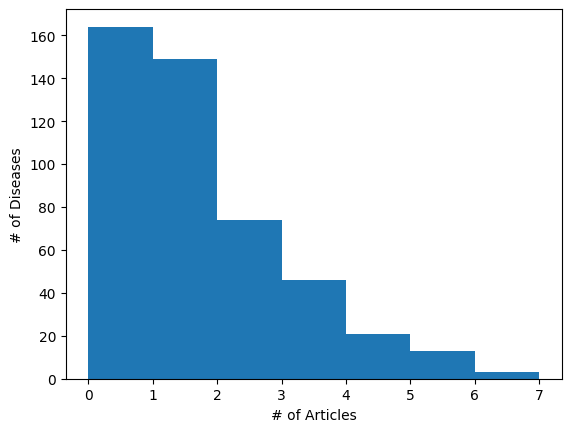

In [10]:
#Plot the figure
objects = tuple(dz_num)
performance = list(dz_num.values())

fig = plt.figure()
plt.ylabel('# of Diseases')
plt.xlabel('# of Articles')
plt.hist(performance, bins=[0,1,2,3,4,5,6,7])

plt.show()

In [11]:
fig.savefig('DiseaseSampleEpi_HistFINAL.svg', dpi=400,format='svg', bbox_inches='tight')

In [12]:
fig.savefig('DiseaseSampleEpi_HistFINAL.png', dpi=400,format='png', bbox_inches='tight')

In [13]:
zero, one, two, three, four, fiveplus =0,0,0,0,0,0
for k, v in dz_num.items():
        if v>=5:
            fiveplus+=1
        elif v==4:
            four+=1
        elif v==3:
            three+=1
        elif v==2:
            two+=1
        elif v==1:
            one+=1
        elif v==0:
            zero+=1

In [14]:
print(zero)
print(one)
print(two)
print(three)
print(four)
print(fiveplus)
print(zero/5," percent of diseases have 0 epidemiological studies")
print(str((500-fiveplus)/5)+" percent of diseases have less than 5 epidemiological studies")

164
149
74
46
21
16
32.8  percent of diseases have 0 epidemiological studies
96.8 percent of diseases have less than 5 epidemiological studies
